In [1]:
%matplotlib inline
import numpy as np
import nengo
import matplotlib.pyplot as plt
import nengo_dft

In [36]:
N = 100
model = nengo.Network()
with model:
    dft1a = nengo_dft.DFT(shape=[N], h=-4)
    dft1a.add_kernel(exc=17.5, inh=15)
    
    dft1b = nengo_dft.DFT(shape=[N], global_inh=0.9, h=-4)
    dft1b.add_kernel(exc=21, inh=0)

    dft1c = nengo_dft.DFT(shape=[N], h=-4)
    dft1c.add_kernel(exc=30, inh=27.5)
    
    
    x = np.arange(N)
    def stim_func(t):
        if t > 0.5:
            return x*0
        else:
            return 7.3*np.exp(-0.5*((x-25)/5)**2) + 7.3*np.exp(-0.5*((x-75)/5)**2)
    stim = nengo.Node(stim_func)
    nengo.Connection(stim, dft1a.s, synapse=None)
    nengo.Connection(stim, dft1b.s, synapse=None)
    nengo.Connection(stim, dft1c.s, synapse=None)
    
    p_1a = nengo.Probe(dft1a.g.neurons)
    p_1b = nengo.Probe(dft1b.g.neurons)
    p_1c = nengo.Probe(dft1c.g.neurons)
    p_stim = nengo.Probe(stim)
    
    dft2a = nengo_dft.DFT(shape=[N, N], h=-4)
    k = dft2a.add_kernel(exc=17.5, inh=15, epsilon=0.01)

    dft2b = nengo_dft.DFT(shape=[N, N], global_inh=0.1, h=-4)
    dft2b.add_kernel(exc=21, inh=0, epsilon=0.01)

    dft2c = nengo_dft.DFT(shape=[N, N], h=-4)
    dft2c.add_kernel(exc=30, inh=27.5, epsilon=0.01)
    
    xx, yy = np.meshgrid(np.arange(N), np.arange(N))
    def stim_func(t):
        if t > 0.5:
            return (xx*0).flatten()
        else:
            return (7.3*np.exp(-0.5*(((xx-25)**2+(yy-25)**2)/5**2)) + 7.3*np.exp(-0.5*(((xx-75)**2+(yy-75)**2)/5**2))).flatten()
    stim2 = nengo.Node(stim_func)
    nengo.Connection(stim2, dft2a.s, synapse=None)
    nengo.Connection(stim2, dft2b.s, synapse=None)
    nengo.Connection(stim2, dft2c.s, synapse=None)
    
    p_2a = nengo.Probe(dft2a.g.neurons)
    p_2b = nengo.Probe(dft2b.g.neurons)
    p_2c = nengo.Probe(dft2c.g.neurons)
    
    
import nengo_ocl
sim = nengo_ocl.Simulator(model)
with sim:
    sim.run(1.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

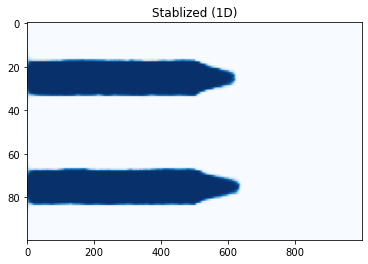

In [50]:
plt.imshow(sim.data[p_1a].T, aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.title('Stablized (1D)')
plt.show()

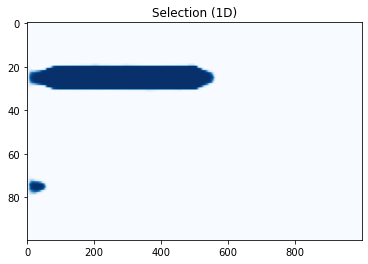

In [49]:
plt.imshow(sim.data[p_1b].T, aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.title('Selection (1D)')
plt.show()

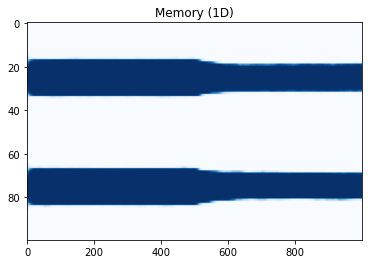

In [48]:
plt.imshow(sim.data[p_1c].T, aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.title('Memory (1D)')
plt.show()

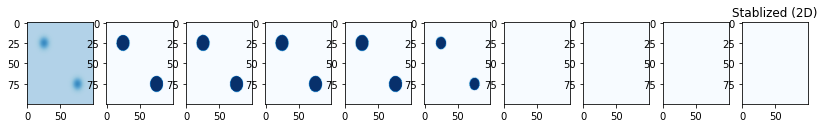

In [47]:
plt.figure(figsize=(14,1.5))

for i, index in enumerate(np.linspace(0, 999, 10).astype(int)):
    plt.subplot(1, 10, i+1)
    plt.imshow(sim.data[p_2a][index].reshape((N,N)), aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.title('Stablized (2D)')
plt.show()

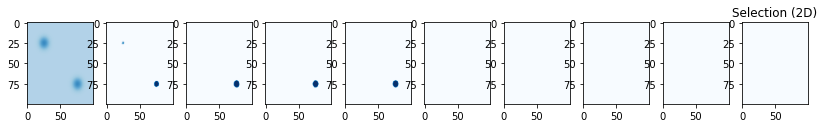

In [51]:
plt.figure(figsize=(14,1.5))
for i, index in enumerate(np.linspace(0, 999, 10).astype(int)):
    plt.subplot(1, 10, i+1)
    plt.imshow(sim.data[p_2b][index].reshape((N,N)), aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.title('Selection (2D)')
plt.show()


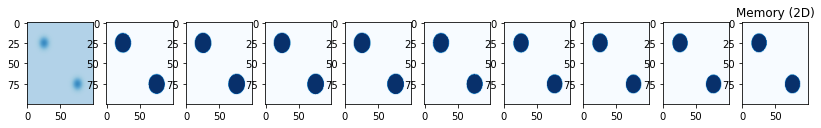

In [52]:
plt.figure(figsize=(14,1.5))
for i, index in enumerate(np.linspace(0, 999, 10).astype(int)):
    plt.subplot(1, 10, i+1)
    plt.imshow(sim.data[p_2c][index].reshape((N,N)), aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.title('Memory (2D)')
plt.show()
